In [1]:
import random
import multiprocessing
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [2]:
def random_rhombus(): # 1M random points in rhombus
    points = []
    while len(points) < 1000000:
        x = random.random()
        y = random.random()

        # Check if the point falls within the rhombus
        if (x >= 0 and x <= 0.5 and y >= 0.5 - x and y <= 0.5 + x) or \
                (x >= 0.5 and x <= 1 and y >= x - 0.5 and y <= 1.5 - x):
            points.append((x, y))

    return points

In [3]:
def patienceSorting(sorted_df, order):
    # here, what this PS function returns is the numbers of piles each point is in
    places = [0]
    piles = [[sorted_df[0]]]

    for i in tqdm(range(1, len(sorted_df))):
            flag = True
            # Traverse all the piles
            for j in range(len(piles)):
                # Check if the element to be inserted is less than
                # current pile's top
                if order:
                    if sorted_df[i][1] < piles[j][-1][1]:
                        piles[j].append(sorted_df[i])
                        places.append(j)
                        # Update flag
                        flag = False
                        break
                else:
                    if sorted_df[i][1] > piles[j][-1][1]:
                        piles[j].append(sorted_df[i])
                        places.append(j)
                        # Update flag
                        flag = False
                        break

            # If flag is True
            if flag:
                # Insert current pile into all the piles
                places.append(len(piles))
                piles.append([sorted_df[i]])
                
    return places

In [7]:
def plot_the_points(sorted_p, longest_paths, num):
    # Sort the points based on longest_paths
    sorted_by_path = sorted(zip(sorted_p, longest_paths), key=lambda x: x[1])
    # Divide points into groups based on percentiles
    num_groups = 10
    group_size = len(sorted_by_path) // num_groups
    groups = [sorted_by_path[i*group_size:(i+1)*group_size] for i in range(num_groups)]
    
    # Plot the points with different colors for each group
    plt.figure(figsize=(10, 10))
    for i, group in enumerate(groups):
        x_coords = [point[0][0] for point in group]
        y_coords = [point[0][1] for point in group]
        plt.scatter(x_coords, y_coords, label=f'Pile group {i+1}')
    
    min_value = min(longest_paths)
    max_value = max(longest_paths)
    plt.text(0.05, 0.95, f'Min: {min_value}', transform=plt.gca().transAxes, color='red')
    plt.text(0.05, 0.90, f'Max: {max_value}', transform=plt.gca().transAxes, color='red')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Plot of Points Divided into Groups Based on Longest Paths')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'plots/png/longest_paths_in_rhombus_{num}.png')
    plt.savefig(f'plots/pdf/longest_paths_in_rhombus_{num}.pdf')
    plt.show()

In [5]:
def calc_paths(points, num):
    sorted_p = sorted(points, key= lambda x: x[0]) # points ordered by x
    places1 = patienceSorting(sorted_p, True) # get a list of each point's pile using PS
    sorted_rev = sorted_p[::-1] # reverse the list of points
    places2 = patienceSorting(sorted_rev, False) # do that again, now backwards
    places2.reverse() # reverse to match places1's order
    longest_paths = []
    for elem1, elem2 in tqdm(zip(places1, places2)):
        longest_paths.append(elem1 + elem2 + 1)
    plot_the_points(sorted_p, longest_paths, num)

100%|██████████| 999999/999999 [01:43<00:00, 9701.91it/s] 
1000000it [00:00, 3535877.62it/s]


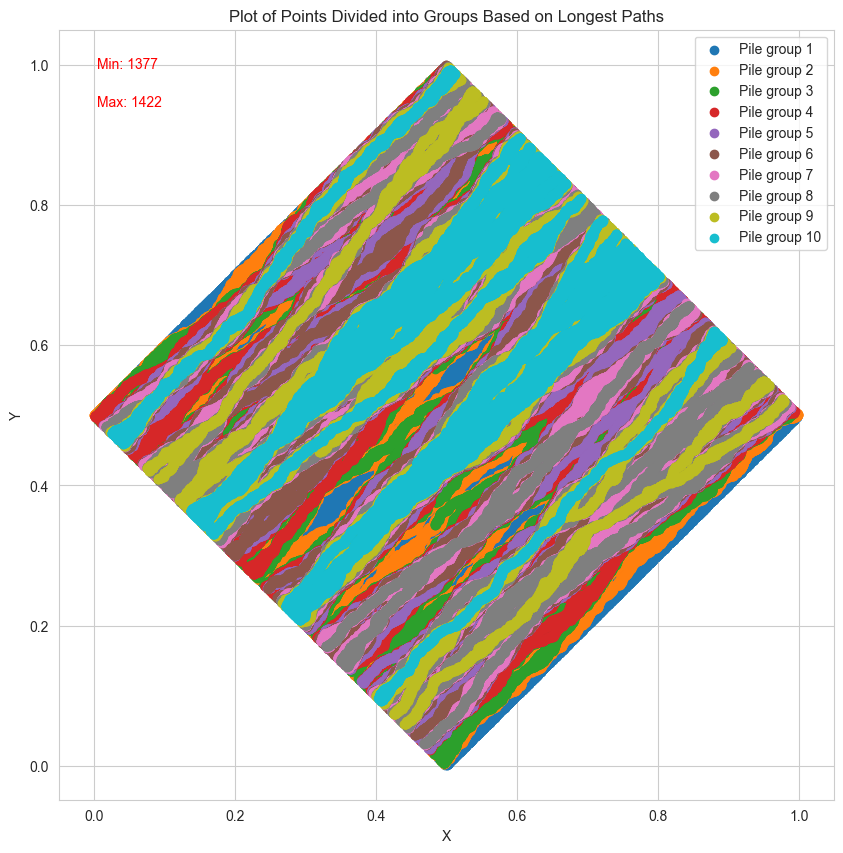

100%|██████████| 999999/999999 [01:54<00:00, 8726.56it/s] 
1000000it [00:00, 3209677.62it/s]


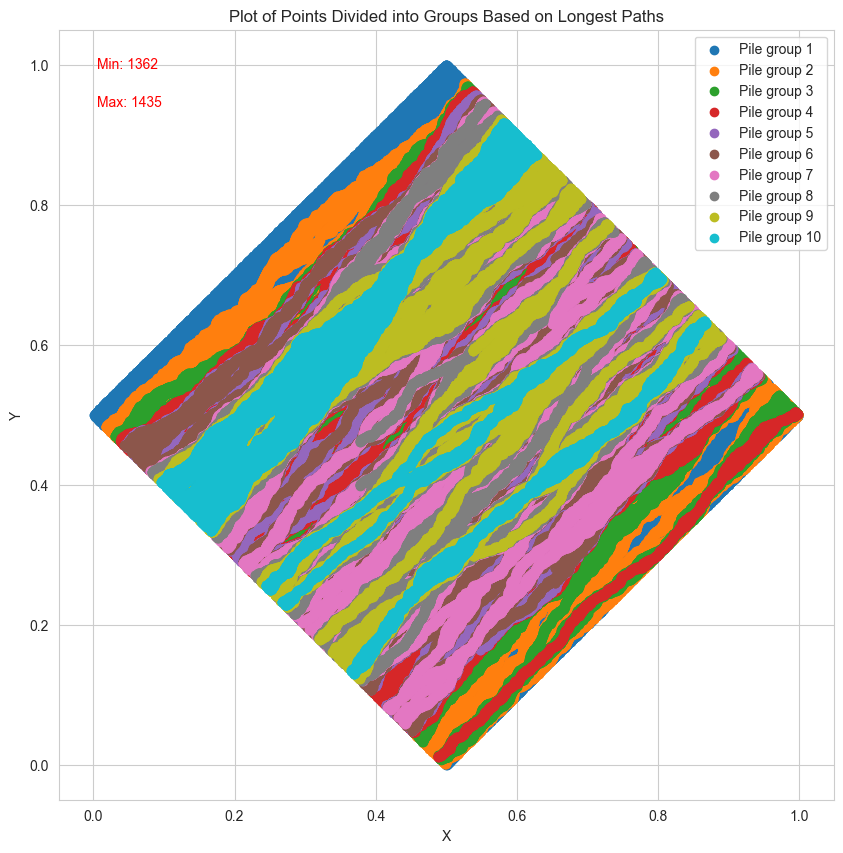

100%|██████████| 999999/999999 [02:11<00:00, 7623.05it/s] 
1000000it [00:00, 1591582.00it/s]


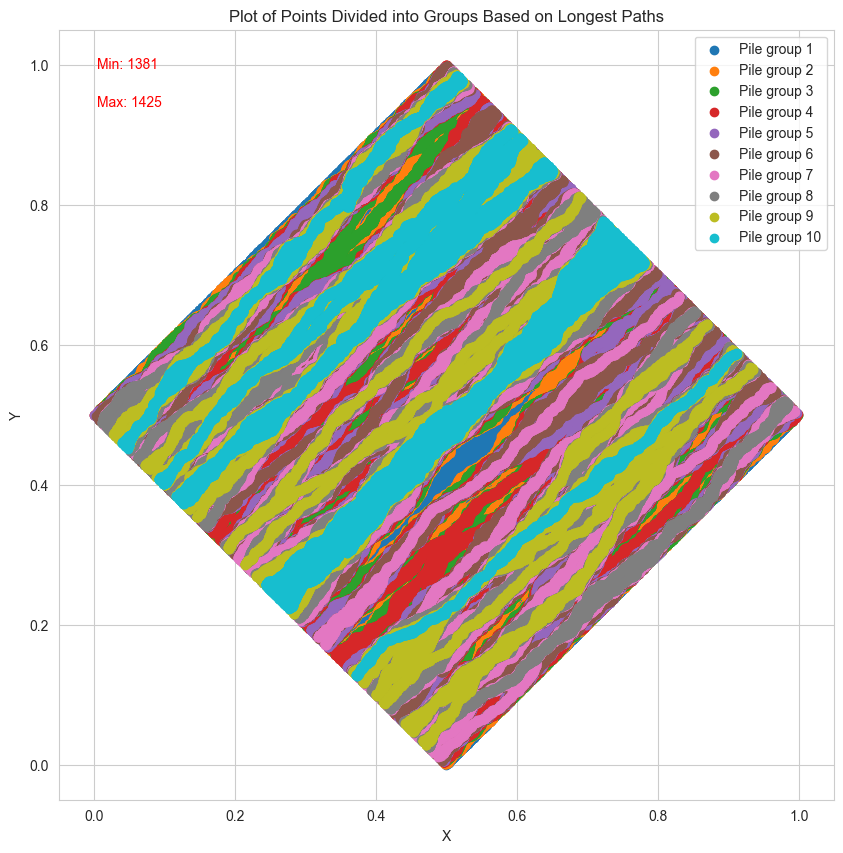

100%|██████████| 999999/999999 [02:01<00:00, 8247.69it/s] 
1000000it [00:00, 1718595.30it/s]


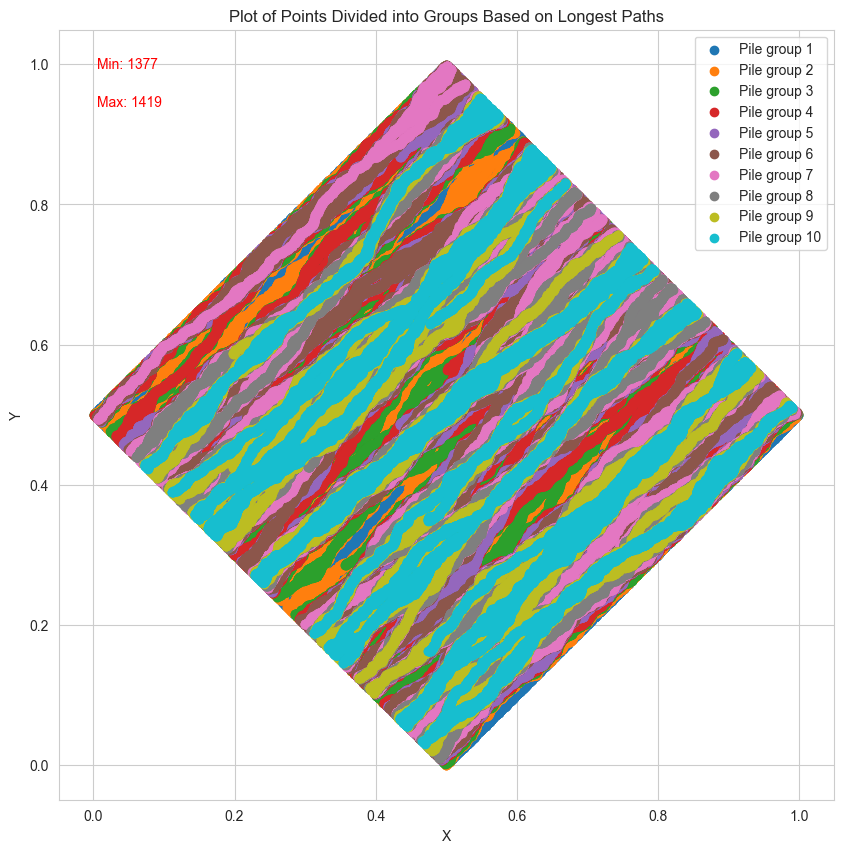

100%|██████████| 999999/999999 [02:06<00:00, 7903.54it/s] 
1000000it [00:00, 2098776.45it/s]


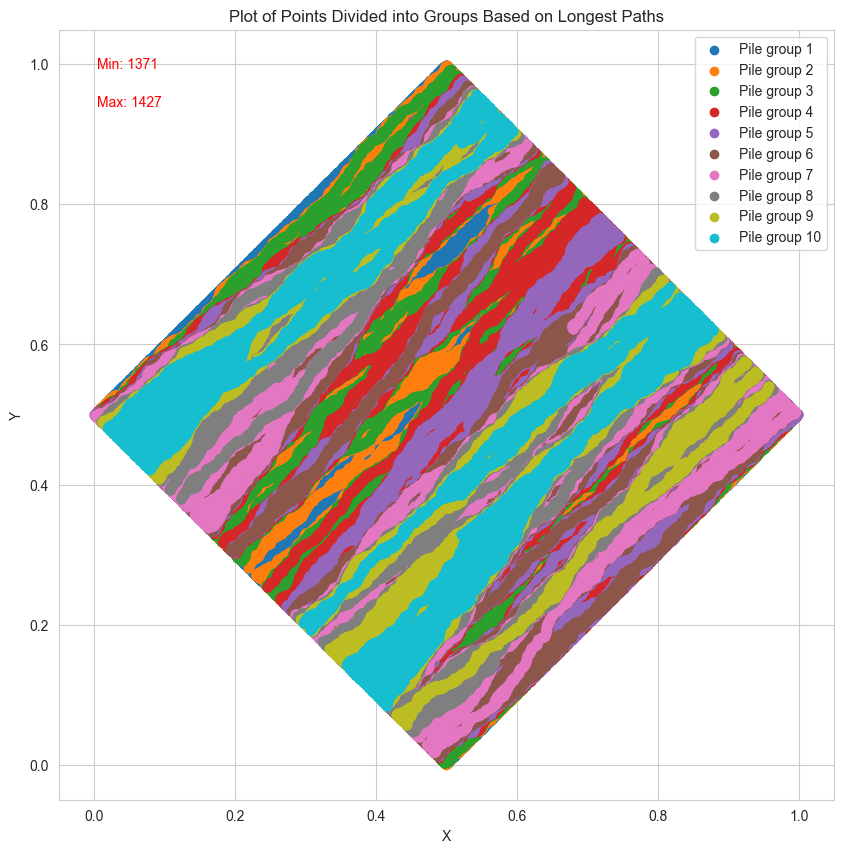

100%|██████████| 999999/999999 [02:14<00:00, 7435.67it/s] 
1000000it [00:00, 1932366.54it/s]


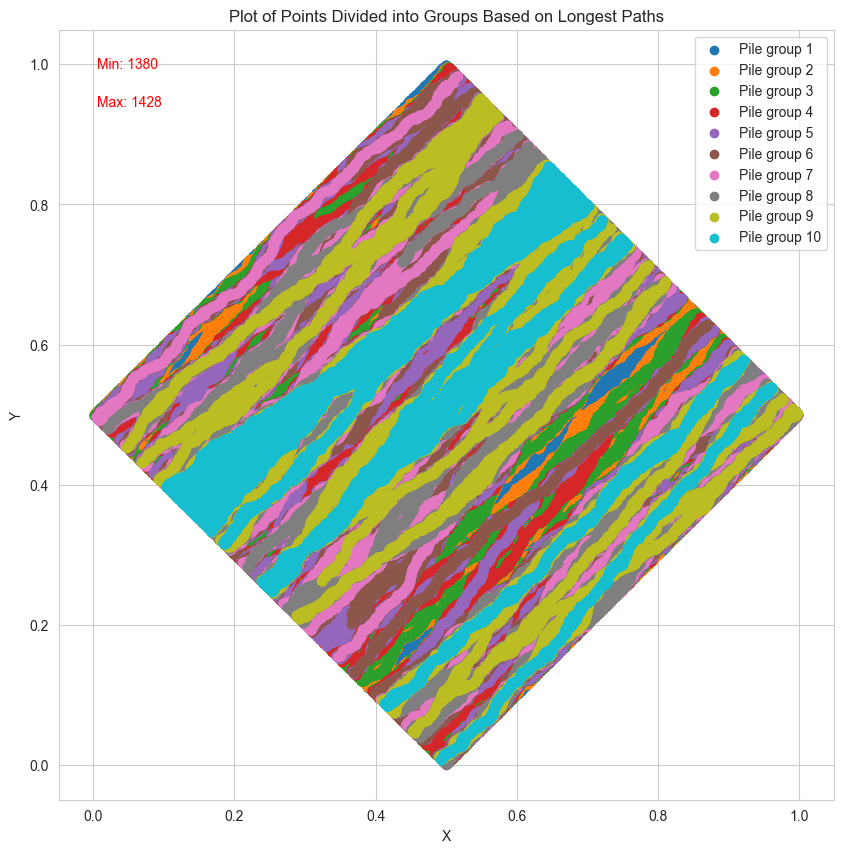

100%|██████████| 999999/999999 [02:15<00:00, 7368.81it/s] 
1000000it [00:00, 1989096.33it/s]


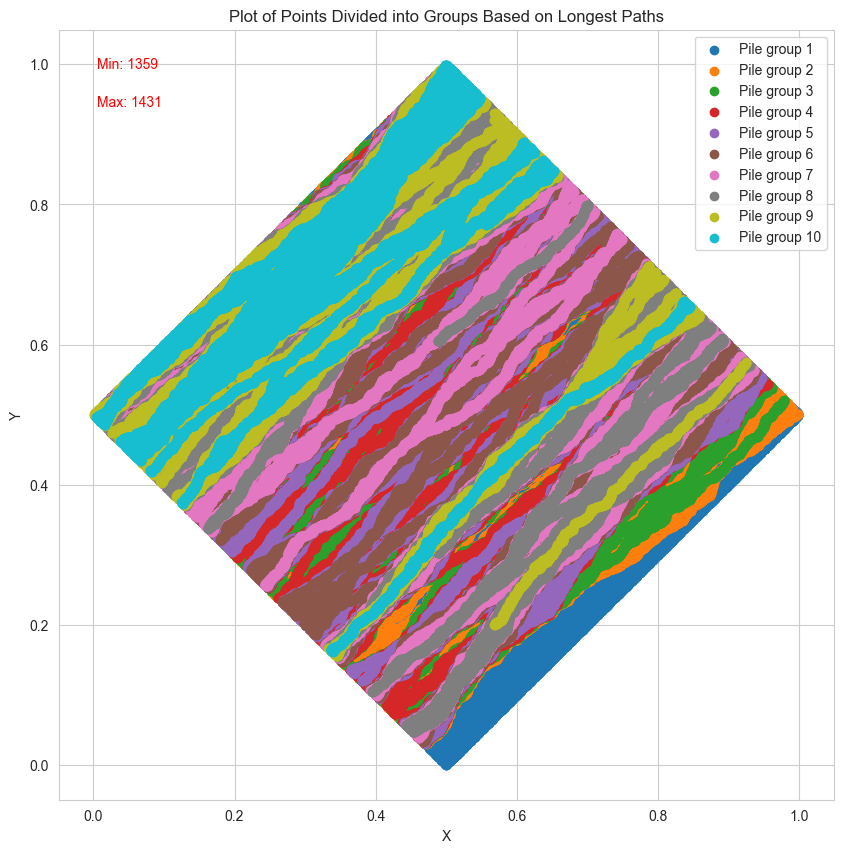

100%|██████████| 999999/999999 [02:13<00:00, 7465.74it/s] 
1000000it [00:00, 2124481.33it/s]


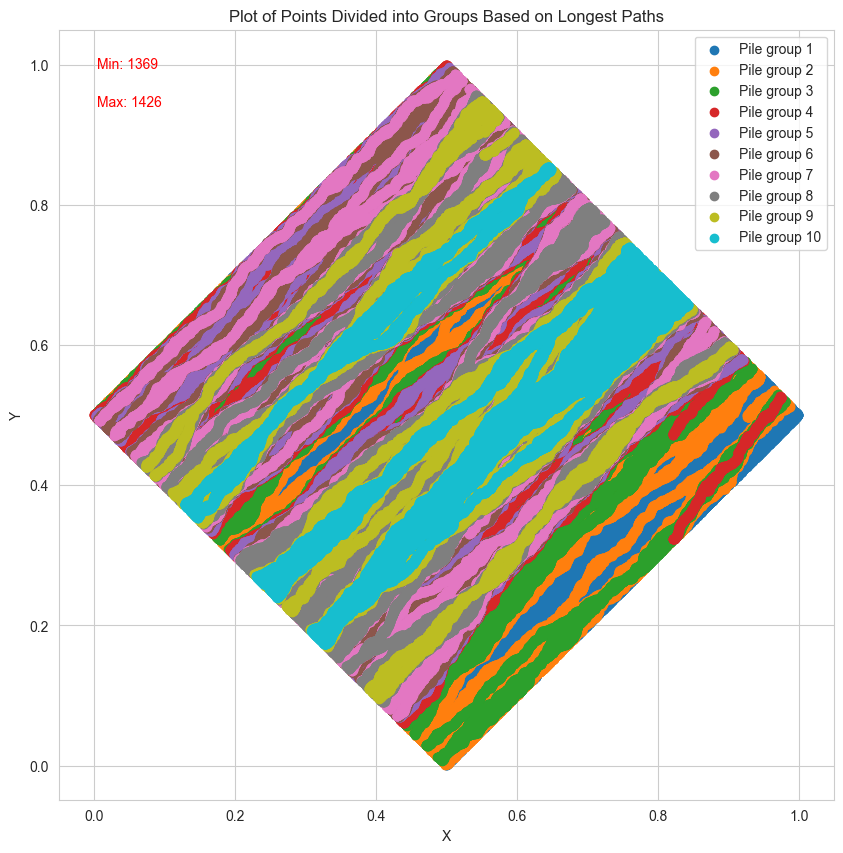

100%|██████████| 999999/999999 [02:14<00:00, 7447.24it/s] 
1000000it [00:00, 2047085.41it/s]


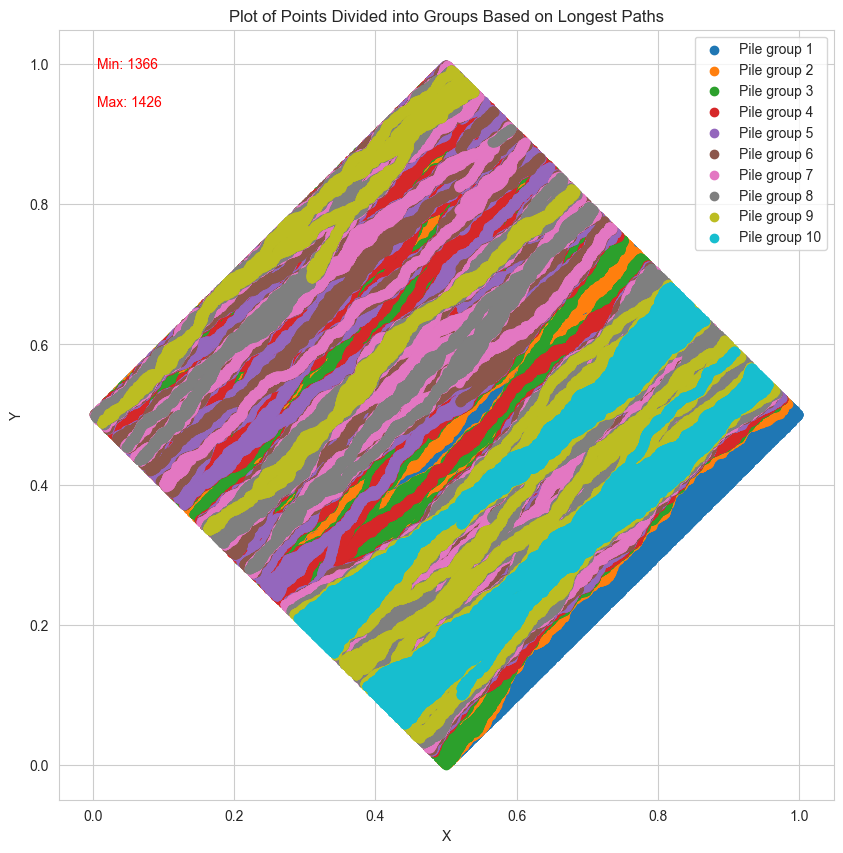

100%|██████████| 999999/999999 [01:17<00:00, 12855.02it/s]
1000000it [00:00, 3299330.82it/s]


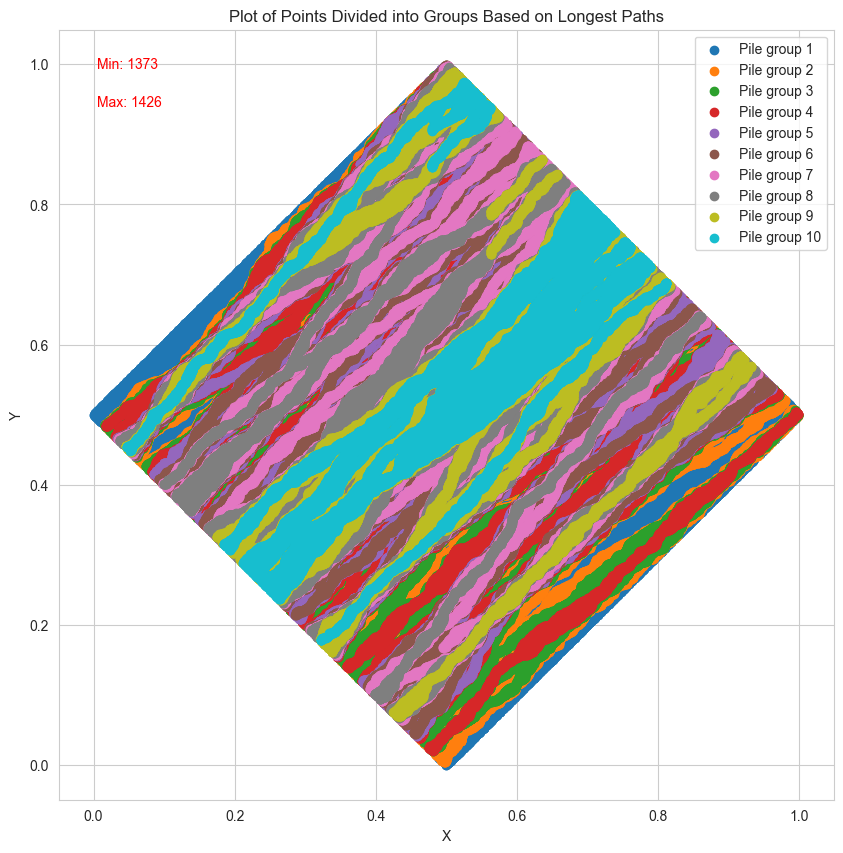

In [8]:
for i in range(10):
    p = random_rhombus()
    calc_paths(p, i+1)